In [13]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
import glob
import gzip
from matplotlib.ticker import PercentFormatter
from datetime import date
from operator import attrgetter
import io
import sys
from contextlib import redirect_stdout
# %matplotlib inline

In [14]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [15]:
def create_lineplot(y, var, title, ylabel, ax1):
    sns.lineplot(x='date', y=y, 
            hue=var, 
            data=data_groupby_date_infectoion,
            markers=True,
            # markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'],
            # plot_kws=dict(alpha=0.5),
            ax=ax1)
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=90)
    ax1.axvline(x="2020-01", color='black', ls='--', lw=1.5)
    ax1.axvline(x="2020-04", color='black', ls='--', lw=1.5)
    ax1.axvline(x="2021-04", color='black', ls='--', lw=1.5)

In [16]:
def create_lineplot_nolegend(y, var, title, ylabel, ax1):
    sns.lineplot(x='date', y=y, 
            hue=var, 
            data=data_groupby_date_infectoion,
            markers=True,
            # markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'],
            # plot_kws=dict(alpha=0.5),
            ax=ax1)
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel('Date')
    ax1.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=90)
    ax1.axvline(x="2020-01", color='black', ls='--', lw=1.5)
    ax1.axvline(x="2020-04", color='black', ls='--', lw=1.5)
    ax1.axvline(x="2021-04", color='black', ls='--', lw=1.5)
    ax1.legend([],[], frameon=False)

In [17]:
#transfer data from other notebooks
# %store -r data_uti
# %store -r data_urti
# %store -r data_lrti
# %store -r data_sinusitis
# %store -r data_otmedia
# %store -r data_ot_externa

data_lrti = pd.read_csv(f'../output/hospitalisation_prediction_lrti/data_lrti.csv')
data_urti = pd.read_csv(f'../output/hospitalisation_prediction_urti/data_urti.csv')
data_uti = pd.read_csv(f'../output/hospitalisation_prediction_uti/data_uti.csv')
data_sinusitis = pd.read_csv(f'../output/hospitalisation_prediction_sinusitis/data_sinusitis.csv')
data_otmedia = pd.read_csv(f'../output/hospitalisation_prediction_otmedia/data_otmedia.csv')
data_ot_externa = pd.read_csv(f'../output/hospitalisation_prediction_ot_externa/data_ot_externa.csv')

In [18]:
#select relevant columns of data
data_uti = data_uti[['date', 'event_uti_admitted', 'gp_cons_uti_ab', 'incdt_uti_date']]
data_urti = data_urti[['date', 'event_urti_admitted', 'gp_cons_urti_ab', 'incdt_urti_date']]
data_lrti = data_lrti[['date', 'event_lrti_admitted', 'gp_cons_lrti_ab', 'incdt_lrti_date']]
data_sinusitis = data_sinusitis[['date', 'event_sinusitis_admitted', 'gp_cons_sinusitis_ab', 'incdt_sinusitis_date']]
data_otmedia = data_otmedia[['date', 'event_otmedia_admitted', 'gp_cons_otmedia_ab', 'incdt_otmedia_date']]
data_ot_externa = data_ot_externa[['date', 'event_ot_externa_admitted', 'gp_cons_ot_externa_ab', 'incdt_ot_externa_date']]

# data_uti.head()

In [19]:
# add variables for incdt, prevl, no_abs, abs for uti
data_uti.loc[((data_uti['gp_cons_uti_ab'].isnull() == True) & (data_uti['incdt_uti_date'] == 0)), 'no_ab_incdt'] = 1
data_uti.loc[((data_uti['gp_cons_uti_ab'].isnull() == False) & (data_uti['incdt_uti_date'] == 0)), 'ab_incdt'] = 1
data_uti.loc[((data_uti['gp_cons_uti_ab'].isnull() == True) & (data_uti['incdt_uti_date'] == 1)), 'no_ab_prevl'] = 1
data_uti.loc[((data_uti['gp_cons_uti_ab'].isnull() == False) & (data_uti['incdt_uti_date'] == 1)), 'ab_prevl'] = 1

data_uti.loc[((data_uti['gp_cons_uti_ab'].isnull() == True) & (data_uti['incdt_uti_date'] == 0) & (data_uti['event_uti_admitted'] == 1)), 'hosp_no_ab_incdt'] = 1
data_uti.loc[((data_uti['gp_cons_uti_ab'].isnull() == False) & (data_uti['incdt_uti_date'] == 0) & (data_uti['event_uti_admitted'] == 1)), 'hosp_ab_incdt'] = 1
data_uti.loc[((data_uti['gp_cons_uti_ab'].isnull() == True) & (data_uti['incdt_uti_date'] == 1) & (data_uti['event_uti_admitted'] == 1)), 'hosp_no_ab_prevl'] = 1
data_uti.loc[((data_uti['gp_cons_uti_ab'].isnull() == False) & (data_uti['incdt_uti_date'] == 1) & (data_uti['event_uti_admitted'] == 1)), 'hosp_ab_prevl'] = 1

data_uti['infection'] = 'uti'
data_uti['event_admitted'] = data_uti['event_uti_admitted']
data_uti = data_uti[['infection', 'event_admitted', 'date', 'no_ab_incdt', 'ab_incdt', 'no_ab_prevl', 'ab_prevl', 'hosp_no_ab_incdt', 'hosp_ab_incdt', 'hosp_no_ab_prevl', 'hosp_ab_prevl']]

In [20]:
# add variables for incdt, prevl, no_abs, abs for urti
data_urti.loc[((data_urti['gp_cons_urti_ab'].isnull() == True) & (data_urti['incdt_urti_date'] == 0)), 'no_ab_incdt'] = 1
data_urti.loc[((data_urti['gp_cons_urti_ab'].isnull() == False) & (data_urti['incdt_urti_date'] == 0)), 'ab_incdt'] = 1
data_urti.loc[((data_urti['gp_cons_urti_ab'].isnull() == True) & (data_urti['incdt_urti_date'] == 1)), 'no_ab_prevl'] = 1
data_urti.loc[((data_urti['gp_cons_urti_ab'].isnull() == False) & (data_urti['incdt_urti_date'] == 1)), 'ab_prevl'] = 1

data_urti.loc[((data_urti['gp_cons_urti_ab'].isnull() == True) & (data_urti['incdt_urti_date'] == 0) & (data_urti['event_urti_admitted'] == 1)), 'hosp_no_ab_incdt'] = 1
data_urti.loc[((data_urti['gp_cons_urti_ab'].isnull() == False) & (data_urti['incdt_urti_date'] == 0) & (data_urti['event_urti_admitted'] == 1)), 'hosp_ab_incdt'] = 1
data_urti.loc[((data_urti['gp_cons_urti_ab'].isnull() == True) & (data_urti['incdt_urti_date'] == 1) & (data_urti['event_urti_admitted'] == 1)), 'hosp_no_ab_prevl'] = 1
data_urti.loc[((data_urti['gp_cons_urti_ab'].isnull() == False) & (data_urti['incdt_urti_date'] == 1) & (data_urti['event_urti_admitted'] == 1)), 'hosp_ab_prevl'] = 1

data_urti['infection'] = 'urti'
data_urti['event_admitted'] = data_urti['event_urti_admitted']
data_urti = data_urti[['infection', 'event_admitted', 'date', 'no_ab_incdt', 'ab_incdt', 'no_ab_prevl', 'ab_prevl', 'hosp_no_ab_incdt', 'hosp_ab_incdt', 'hosp_no_ab_prevl', 'hosp_ab_prevl']]

In [21]:
# add variables for incdt, prevl, no_abs, abs for lrti
data_lrti.loc[((data_lrti['gp_cons_lrti_ab'].isnull() == True) & (data_lrti['incdt_lrti_date'] == 0)), 'no_ab_incdt'] = 1
data_lrti.loc[((data_lrti['gp_cons_lrti_ab'].isnull() == False) & (data_lrti['incdt_lrti_date'] == 0)), 'ab_incdt'] = 1
data_lrti.loc[((data_lrti['gp_cons_lrti_ab'].isnull() == True) & (data_lrti['incdt_lrti_date'] == 1)), 'no_ab_prevl'] = 1
data_lrti.loc[((data_lrti['gp_cons_lrti_ab'].isnull() == False) & (data_lrti['incdt_lrti_date'] == 1)), 'ab_prevl'] = 1

data_lrti.loc[((data_lrti['gp_cons_lrti_ab'].isnull() == True) & (data_lrti['incdt_lrti_date'] == 0) & (data_lrti['event_lrti_admitted'] == 1)), 'hosp_no_ab_incdt'] = 1
data_lrti.loc[((data_lrti['gp_cons_lrti_ab'].isnull() == False) & (data_lrti['incdt_lrti_date'] == 0) & (data_lrti['event_lrti_admitted'] == 1)), 'hosp_ab_incdt'] = 1
data_lrti.loc[((data_lrti['gp_cons_lrti_ab'].isnull() == True) & (data_lrti['incdt_lrti_date'] == 1) & (data_lrti['event_lrti_admitted'] == 1)), 'hosp_no_ab_prevl'] = 1
data_lrti.loc[((data_lrti['gp_cons_lrti_ab'].isnull() == False) & (data_lrti['incdt_lrti_date'] == 1) & (data_lrti['event_lrti_admitted'] == 1)), 'hosp_ab_prevl'] = 1

data_lrti['infection'] = 'lrti'
data_lrti['event_admitted'] = data_lrti['event_lrti_admitted']
data_lrti = data_lrti[['infection', 'event_admitted', 'date', 'no_ab_incdt', 'ab_incdt', 'no_ab_prevl', 'ab_prevl', 'hosp_no_ab_incdt', 'hosp_ab_incdt', 'hosp_no_ab_prevl', 'hosp_ab_prevl']]

In [22]:
# add variables for incdt, prevl, no_abs, abs for sinusitis
data_sinusitis.loc[((data_sinusitis['gp_cons_sinusitis_ab'].isnull() == True) & (data_sinusitis['incdt_sinusitis_date'] == 0)), 'no_ab_incdt'] = 1
data_sinusitis.loc[((data_sinusitis['gp_cons_sinusitis_ab'].isnull() == False) & (data_sinusitis['incdt_sinusitis_date'] == 0)), 'ab_incdt'] = 1
data_sinusitis.loc[((data_sinusitis['gp_cons_sinusitis_ab'].isnull() == True) & (data_sinusitis['incdt_sinusitis_date'] == 1)), 'no_ab_prevl'] = 1
data_sinusitis.loc[((data_sinusitis['gp_cons_sinusitis_ab'].isnull() == False) & (data_sinusitis['incdt_sinusitis_date'] == 1)), 'ab_prevl'] = 1

data_sinusitis.loc[((data_sinusitis['gp_cons_sinusitis_ab'].isnull() == True) & (data_sinusitis['incdt_sinusitis_date'] == 0) & (data_sinusitis['event_sinusitis_admitted'] == 1)), 'hosp_no_ab_incdt'] = 1
data_sinusitis.loc[((data_sinusitis['gp_cons_sinusitis_ab'].isnull() == False) & (data_sinusitis['incdt_sinusitis_date'] == 0) & (data_sinusitis['event_sinusitis_admitted'] == 1)), 'hosp_ab_incdt'] = 1
data_sinusitis.loc[((data_sinusitis['gp_cons_sinusitis_ab'].isnull() == True) & (data_sinusitis['incdt_sinusitis_date'] == 1) & (data_sinusitis['event_sinusitis_admitted'] == 1)), 'hosp_no_ab_prevl'] = 1
data_sinusitis.loc[((data_sinusitis['gp_cons_sinusitis_ab'].isnull() == False) & (data_sinusitis['incdt_sinusitis_date'] == 1) & (data_sinusitis['event_sinusitis_admitted'] == 1)), 'hosp_ab_prevl'] = 1

data_sinusitis['infection'] = 'sinusitis'
data_sinusitis['event_admitted'] = data_sinusitis['event_sinusitis_admitted']
data_sinusitis = data_sinusitis[['infection', 'event_admitted', 'date', 'no_ab_incdt', 'ab_incdt', 'no_ab_prevl', 'ab_prevl', 'hosp_no_ab_incdt', 'hosp_ab_incdt', 'hosp_no_ab_prevl', 'hosp_ab_prevl']]

In [23]:
# add variables for incdt, prevl, no_abs, abs for otmedia
data_otmedia.loc[((data_otmedia['gp_cons_otmedia_ab'].isnull() == True) & (data_otmedia['incdt_otmedia_date'] == 0)), 'no_ab_incdt'] = 1
data_otmedia.loc[((data_otmedia['gp_cons_otmedia_ab'].isnull() == False) & (data_otmedia['incdt_otmedia_date'] == 0)), 'ab_incdt'] = 1
data_otmedia.loc[((data_otmedia['gp_cons_otmedia_ab'].isnull() == True) & (data_otmedia['incdt_otmedia_date'] == 1)), 'no_ab_prevl'] = 1
data_otmedia.loc[((data_otmedia['gp_cons_otmedia_ab'].isnull() == False) & (data_otmedia['incdt_otmedia_date'] == 1)), 'ab_prevl'] = 1

data_otmedia.loc[((data_otmedia['gp_cons_otmedia_ab'].isnull() == True) & (data_otmedia['incdt_otmedia_date'] == 0) & (data_otmedia['event_otmedia_admitted'] == 1)), 'hosp_no_ab_incdt'] = 1
data_otmedia.loc[((data_otmedia['gp_cons_otmedia_ab'].isnull() == False) & (data_otmedia['incdt_otmedia_date'] == 0) & (data_otmedia['event_otmedia_admitted'] == 1)), 'hosp_ab_incdt'] = 1
data_otmedia.loc[((data_otmedia['gp_cons_otmedia_ab'].isnull() == True) & (data_otmedia['incdt_otmedia_date'] == 1) & (data_otmedia['event_otmedia_admitted'] == 1)), 'hosp_no_ab_prevl'] = 1
data_otmedia.loc[((data_otmedia['gp_cons_otmedia_ab'].isnull() == False) & (data_otmedia['incdt_otmedia_date'] == 1) & (data_otmedia['event_otmedia_admitted'] == 1)), 'hosp_ab_prevl'] = 1

data_otmedia['infection'] = 'otmedia'
data_otmedia['event_admitted'] = data_otmedia['event_otmedia_admitted']
data_otmedia = data_otmedia[['infection', 'event_admitted', 'date', 'no_ab_incdt', 'ab_incdt', 'no_ab_prevl', 'ab_prevl', 'hosp_no_ab_incdt', 'hosp_ab_incdt', 'hosp_no_ab_prevl', 'hosp_ab_prevl']]

In [24]:
# add variables for incdt, prevl, no_abs, abs for ot_externa
data_ot_externa.loc[((data_ot_externa['gp_cons_ot_externa_ab'].isnull() == True) & (data_ot_externa['incdt_ot_externa_date'] == 0)), 'no_ab_incdt'] = 1
data_ot_externa.loc[((data_ot_externa['gp_cons_ot_externa_ab'].isnull() == False) & (data_ot_externa['incdt_ot_externa_date'] == 0)), 'ab_incdt'] = 1
data_ot_externa.loc[((data_ot_externa['gp_cons_ot_externa_ab'].isnull() == True) & (data_ot_externa['incdt_ot_externa_date'] == 1)), 'no_ab_prevl'] = 1
data_ot_externa.loc[((data_ot_externa['gp_cons_ot_externa_ab'].isnull() == False) & (data_ot_externa['incdt_ot_externa_date'] == 1)), 'ab_prevl'] = 1

data_ot_externa.loc[((data_ot_externa['gp_cons_ot_externa_ab'].isnull() == True) & (data_ot_externa['incdt_ot_externa_date'] == 0) & (data_ot_externa['event_ot_externa_admitted'] == 1)), 'hosp_no_ab_incdt'] = 1
data_ot_externa.loc[((data_ot_externa['gp_cons_ot_externa_ab'].isnull() == False) & (data_ot_externa['incdt_ot_externa_date'] == 0) & (data_ot_externa['event_ot_externa_admitted'] == 1)), 'hosp_ab_incdt'] = 1
data_ot_externa.loc[((data_ot_externa['gp_cons_ot_externa_ab'].isnull() == True) & (data_ot_externa['incdt_ot_externa_date'] == 1) & (data_ot_externa['event_ot_externa_admitted'] == 1)), 'hosp_no_ab_prevl'] = 1
data_ot_externa.loc[((data_ot_externa['gp_cons_ot_externa_ab'].isnull() == False) & (data_ot_externa['incdt_ot_externa_date'] == 1) & (data_ot_externa['event_ot_externa_admitted'] == 1)), 'hosp_ab_prevl'] = 1

data_ot_externa['infection'] = 'ot_externa'
data_ot_externa['event_admitted'] = data_ot_externa['event_ot_externa_admitted']
data_ot_externa = data_ot_externa[['infection', 'event_admitted', 'date', 'no_ab_incdt', 'ab_incdt', 'no_ab_prevl', 'ab_prevl', 'hosp_no_ab_incdt', 'hosp_ab_incdt', 'hosp_no_ab_prevl', 'hosp_ab_prevl']]

In [25]:
#combine all data together
data = data_uti.append([data_urti, data_lrti, data_sinusitis, data_otmedia, data_ot_externa], ignore_index=True)
data

,infection,event_admitted,date,no_ab_incdt,ab_incdt,no_ab_prevl,ab_prevl,hosp_no_ab_incdt,hosp_ab_incdt,hosp_no_ab_prevl,hosp_ab_prevl
0,uti,1.0,2022-01,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,uti,0.0,2022-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,uti,0.0,2022-01,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,uti,0.0,2020-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,uti,0.0,2019-10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39161,ot_externa,0.0,2019-07,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39162,ot_externa,0.0,2020-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39163,ot_externa,0.0,2021-01,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
39164,ot_externa,0.0,2022-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#groupby date and infection type
data_groupby_date_infectoion = data.groupby(['date', 'infection'], as_index=False).sum()
data_groupby_date_infectoion

,date,infection,event_admitted,no_ab_incdt,ab_incdt,no_ab_prevl,ab_prevl,hosp_no_ab_incdt,hosp_ab_incdt,hosp_no_ab_prevl,hosp_ab_prevl
0,2019-01,lrti,2.0,101.0,17.0,9.0,1.0,1.0,1.0,0.0,0.0
1,2019-01,ot_externa,2.0,104.0,13.0,13.0,0.0,1.0,0.0,1.0,0.0
2,2019-01,otmedia,0.0,98.0,16.0,19.0,2.0,0.0,0.0,0.0,0.0
3,2019-01,sinusitis,4.0,342.0,47.0,51.0,5.0,3.0,0.0,1.0,0.0
4,2019-01,urti,2.0,109.0,7.0,16.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
240,2022-05,ot_externa,2.0,74.0,12.0,10.0,2.0,1.0,0.0,1.0,0.0
241,2022-05,otmedia,1.0,82.0,5.0,8.0,0.0,1.0,0.0,0.0,0.0
242,2022-05,sinusitis,2.0,239.0,28.0,30.0,2.0,1.0,0.0,1.0,0.0
243,2022-05,urti,0.0,77.0,13.0,13.0,1.0,0.0,0.0,0.0,0.0


In [27]:
#drop any events equal or less than 5
data_groupby_date_infectoion = data_groupby_date_infectoion[data_groupby_date_infectoion.event_admitted > 5]

In [28]:
#calculate total infections and percentages of each hospitalisation
data_groupby_date_infectoion['total_cases'] = data_groupby_date_infectoion['no_ab_incdt'] + data_groupby_date_infectoion['ab_incdt'] + data_groupby_date_infectoion['no_ab_prevl'] + data_groupby_date_infectoion['ab_prevl']
data_groupby_date_infectoion['hosp_perc'] = (data_groupby_date_infectoion['event_admitted'] / data_groupby_date_infectoion['total_cases'])*100
data_groupby_date_infectoion['hosp_perc_no_ab_incdt'] = (data_groupby_date_infectoion['hosp_no_ab_incdt'] / data_groupby_date_infectoion['no_ab_incdt'])*100
data_groupby_date_infectoion['hosp_perc_ab_incdt'] = (data_groupby_date_infectoion['hosp_ab_incdt'] / data_groupby_date_infectoion['ab_incdt'])*100
data_groupby_date_infectoion['hosp_perc_no_ab_prevl'] = (data_groupby_date_infectoion['hosp_no_ab_prevl'] / data_groupby_date_infectoion['no_ab_prevl'])*100
data_groupby_date_infectoion['hosp_perc_ab_prevl'] = (data_groupby_date_infectoion['hosp_ab_prevl'] / data_groupby_date_infectoion['ab_prevl'])*100
data_groupby_date_infectoion

,date,infection,event_admitted,no_ab_incdt,ab_incdt,no_ab_prevl,ab_prevl,hosp_no_ab_incdt,hosp_ab_incdt,hosp_no_ab_prevl,hosp_ab_prevl,total_cases,hosp_perc,hosp_perc_no_ab_incdt,hosp_perc_ab_incdt,hosp_perc_no_ab_prevl,hosp_perc_ab_prevl
147,2021-01,sinusitis,6.0,343.0,37.0,23.0,2.0,6.0,0.0,0.0,0.0,405.0,1.481481,1.749271,0.0,0.0,0.0
153,2021-02,sinusitis,6.0,250.0,25.0,31.0,3.0,6.0,0.0,0.0,0.0,309.0,1.941748,2.400000,0.0,0.0,0.0


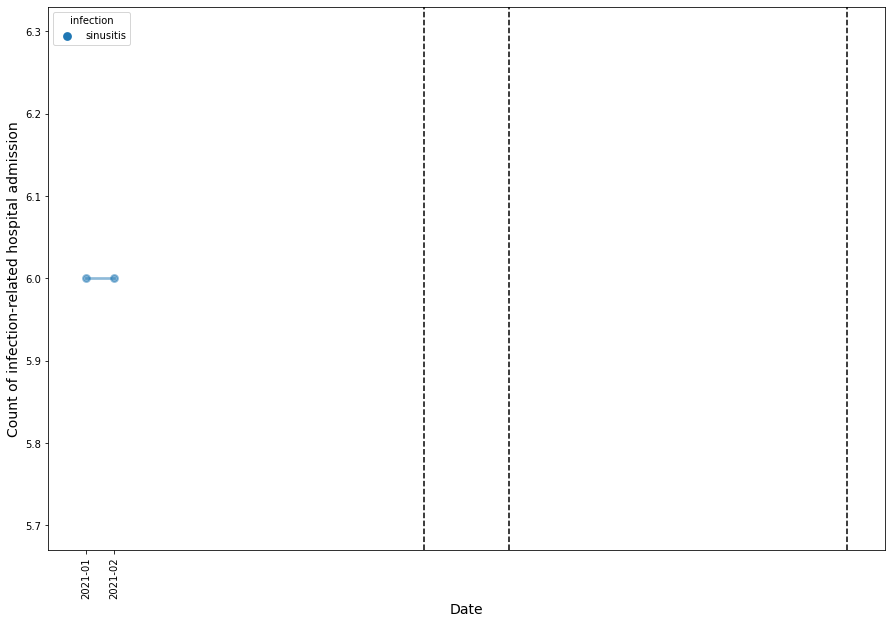

In [29]:
plt.figure(figsize=(15,10))

g = sns.pointplot(data=data_groupby_date_infectoion, y="event_admitted", x="date", hue="infection", 
                markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'], 
                plot_kws=dict(alpha=0.5))

plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line

g.axvline(x=12, color='black', ls='--', lw=1.5) #"2020-01"
g.axvline(x=15, color='black', ls='--', lw=1.5) # "2020-04"
g.axvline(x=27, color='black', ls='--', lw=1.5) # "2021-01"

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of infection-related hospital admission', fontsize=14)
# plt.title('Rate of hospital admission ralated to common infections', fontsize=16)
# plt.legend([],[], frameon=False)
# ax.set_xticklabels([])
# plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_count.jpg')
plt.show()

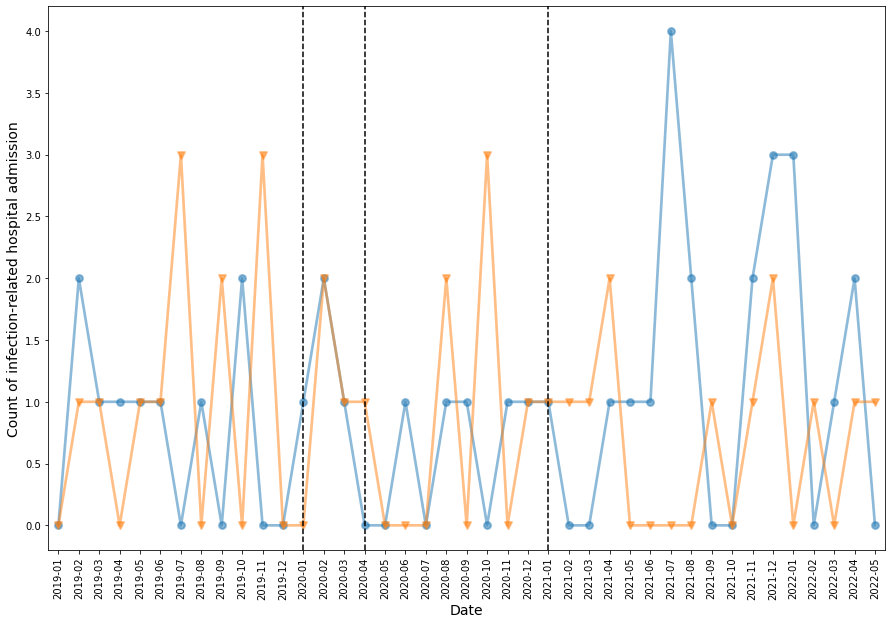

In [217]:
plt.figure(figsize=(15,10))

g = sns.pointplot(data=data_groupby_date_infectoion, y="event_admitted", x="date", hue="infection", 
                markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'], 
                plot_kws=dict(alpha=0.5))

plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line

g.axvline(x=12, color='black', ls='--', lw=1.5) #"2020-01"
g.axvline(x=15, color='black', ls='--', lw=1.5) # "2020-04"
g.axvline(x=27, color='black', ls='--', lw=1.5) # "2021-01"

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of infection-related hospital admission', fontsize=14)
# plt.title('Rate of hospital admission ralated to common infections', fontsize=16)
plt.legend([],[], frameon=False)
# ax.set_xticklabels([])
# plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_count_nolegend.jpg')
plt.show()

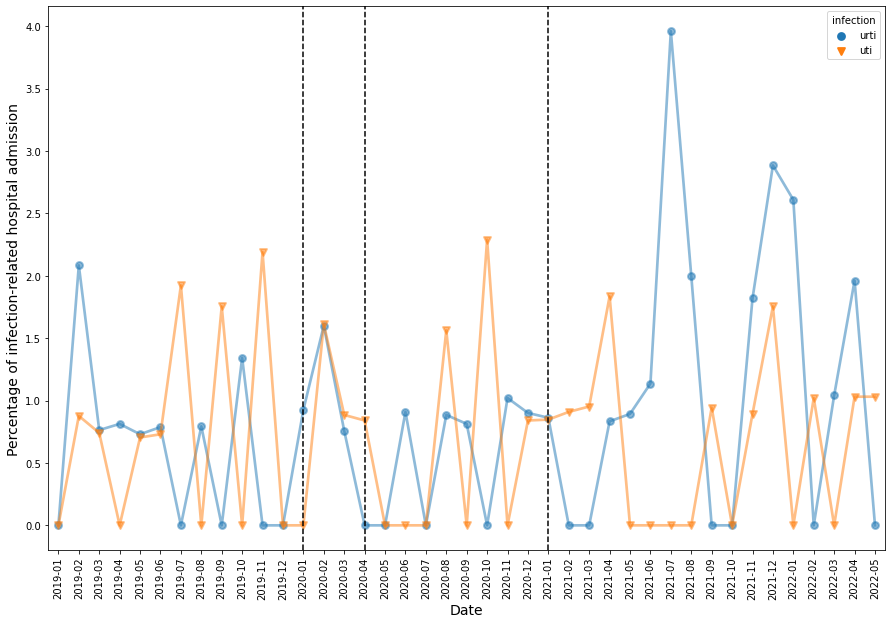

In [211]:
plt.figure(figsize=(15,10))

g = sns.pointplot(data=data_groupby_date_infectoion, y="hosp_perc", x="date", hue="infection", 
                markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'], 
                plot_kws=dict(alpha=0.5))

plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line

g.axvline(x=12, color='black', ls='--', lw=1.5) #"2020-01"
g.axvline(x=15, color='black', ls='--', lw=1.5) # "2020-04"
g.axvline(x=27, color='black', ls='--', lw=1.5) # "2021-01"

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage of infection-related hospital admission', fontsize=14)
# plt.title('Rate of hospital admission ralated to common infections', fontsize=16)
# plt.legend([],[], frameon=False)
# ax.set_xticklabels([])
# plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_percentage.jpg')
plt.show()

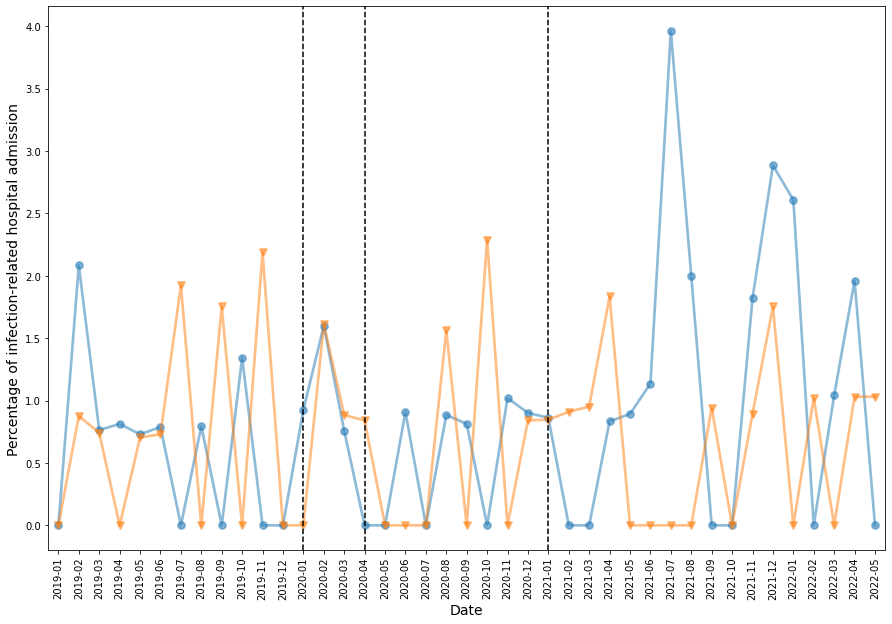

In [218]:
plt.figure(figsize=(15,10))

g = sns.pointplot(data=data_groupby_date_infectoion, y="hosp_perc", x="date", hue="infection", 
                markers=['o', 'v', 's', '^', '<', '*', 'h', 'H', '+', 'x', '1', '2', '3', '4', '5'], 
                plot_kws=dict(alpha=0.5))

plt.setp(g.collections, alpha=.5) #alpha for markers
plt.setp(g.lines, alpha=.5) #alpha for line

g.axvline(x=12, color='black', ls='--', lw=1.5) #"2020-01"
g.axvline(x=15, color='black', ls='--', lw=1.5) # "2020-04"
g.axvline(x=27, color='black', ls='--', lw=1.5) # "2021-01"

plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage of infection-related hospital admission', fontsize=14)
# plt.title('Rate of hospital admission ralated to common infections', fontsize=16)
plt.legend([],[], frameon=False)
# ax.set_xticklabels([])
# plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_percentage_nolegend.jpg')
plt.show()

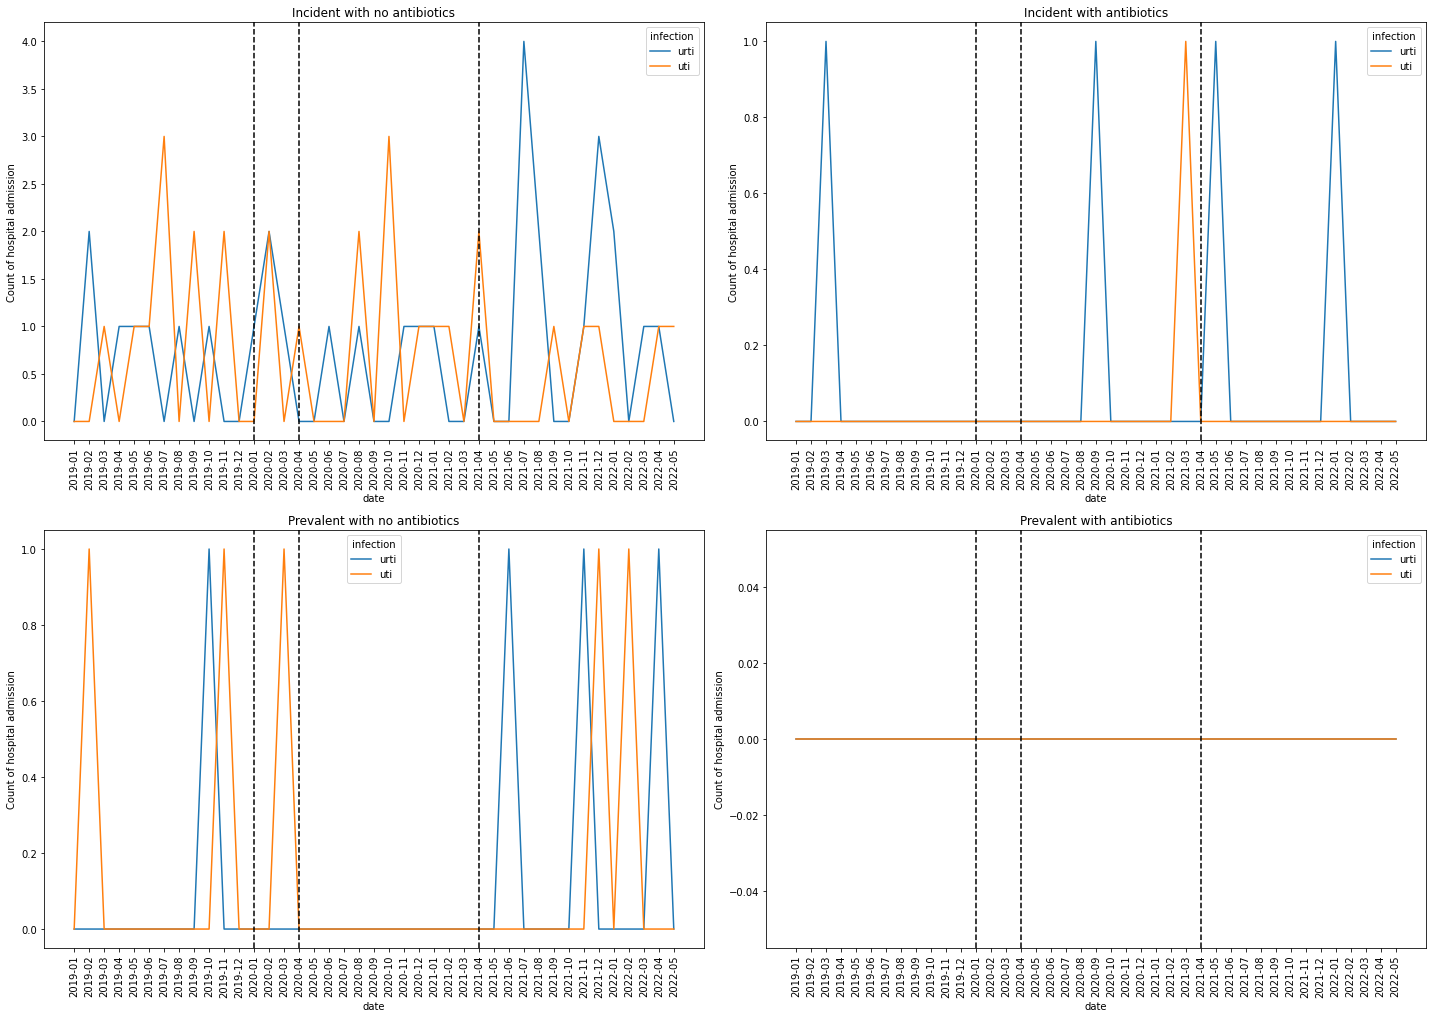

In [215]:
fig, axes = plt.subplots(2,2,
                        figsize=(20, 15)
                        )
create_lineplot('hosp_no_ab_incdt', 'infection', 'Incident with no antibiotics', 'Count of hospital admission', axes[0,0])
create_lineplot('hosp_ab_incdt', 'infection', 'Incident with antibiotics', 'Count of hospital admission', axes[0,1])
create_lineplot('hosp_no_ab_prevl', 'infection', 'Prevalent with no antibiotics', 'Count of hospital admission', axes[1,0])
create_lineplot('hosp_ab_prevl', 'infection', 'Prevalent with antibiotics', 'Count of hospital admission', axes[1,1])
# fig.delaxes(ax=axes[6,1])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_count_incdt_prevl_noabs_abs.jpg')
plt.show()

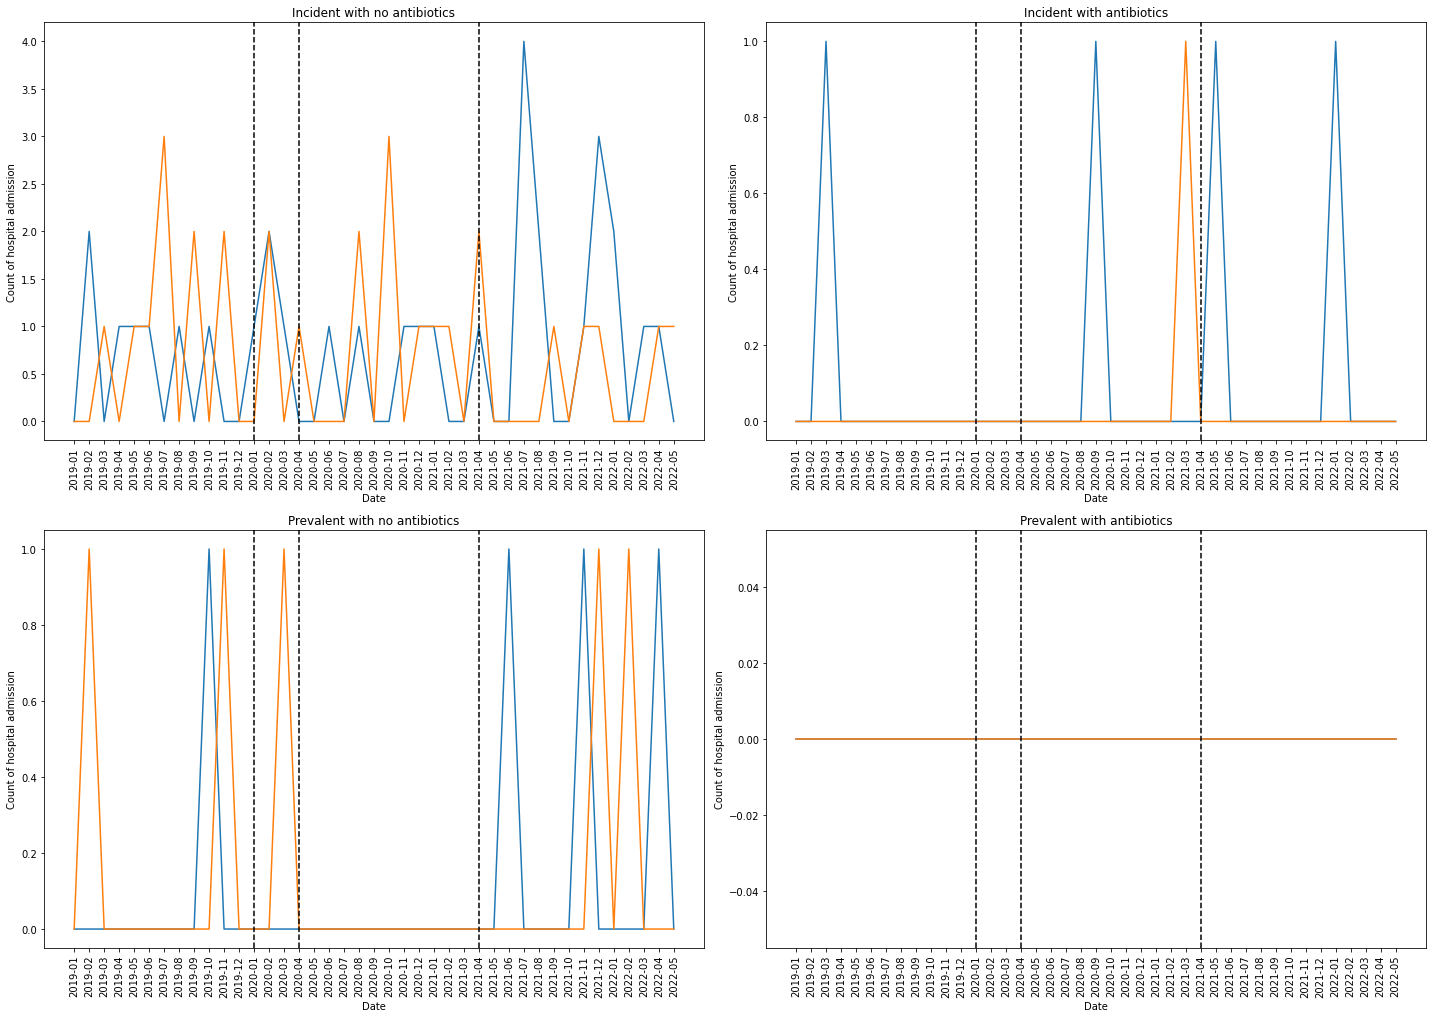

In [208]:
fig, axes = plt.subplots(2,2,
                        figsize=(20, 15)
                        )
create_lineplot_nolegend('hosp_no_ab_incdt', 'infection', 'Incident with no antibiotics', 'Count of hospital admission', axes[0,0])
create_lineplot_nolegend('hosp_ab_incdt', 'infection', 'Incident with antibiotics', 'Count of hospital admission', axes[0,1])
create_lineplot_nolegend('hosp_no_ab_prevl', 'infection', 'Prevalent with no antibiotics', 'Count of hospital admission', axes[1,0])
create_lineplot_nolegend('hosp_ab_prevl', 'infection', 'Prevalent with antibiotics', 'Count of hospital admission', axes[1,1])
# fig.delaxes(ax=axes[6,1])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_count_incdt_prevl_noabs_abs_nolegend.jpg')
plt.show()

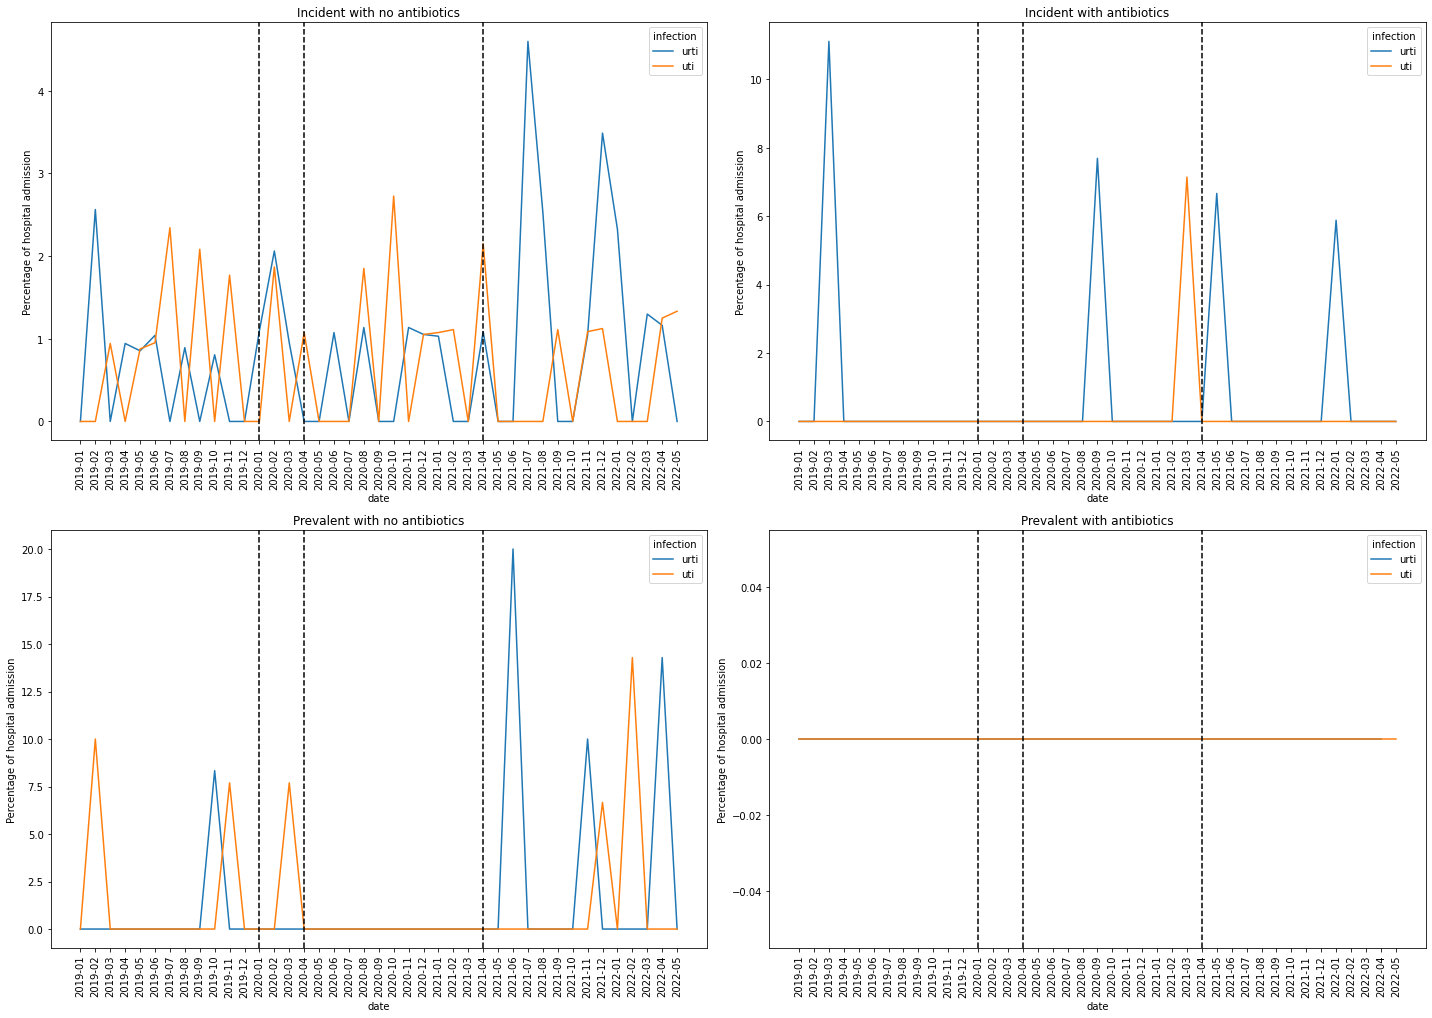

In [209]:
fig, axes = plt.subplots(2,2,
                        figsize=(20, 15)
                        )
create_lineplot('hosp_perc_no_ab_incdt', 'infection', 'Incident with no antibiotics', 'Percentage of hospital admission', axes[0,0])
create_lineplot('hosp_perc_ab_incdt', 'infection', 'Incident with antibiotics', 'Percentage of hospital admission', axes[0,1])
create_lineplot('hosp_perc_no_ab_prevl', 'infection', 'Prevalent with no antibiotics', 'Percentage of hospital admission', axes[1,0])
create_lineplot('hosp_perc_ab_prevl', 'infection', 'Prevalent with antibiotics', 'Percentage of hospital admission', axes[1,1])
# fig.delaxes(ax=axes[6,1])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_percentage_incdt_prevl_noabs_abs.jpg')
plt.show()

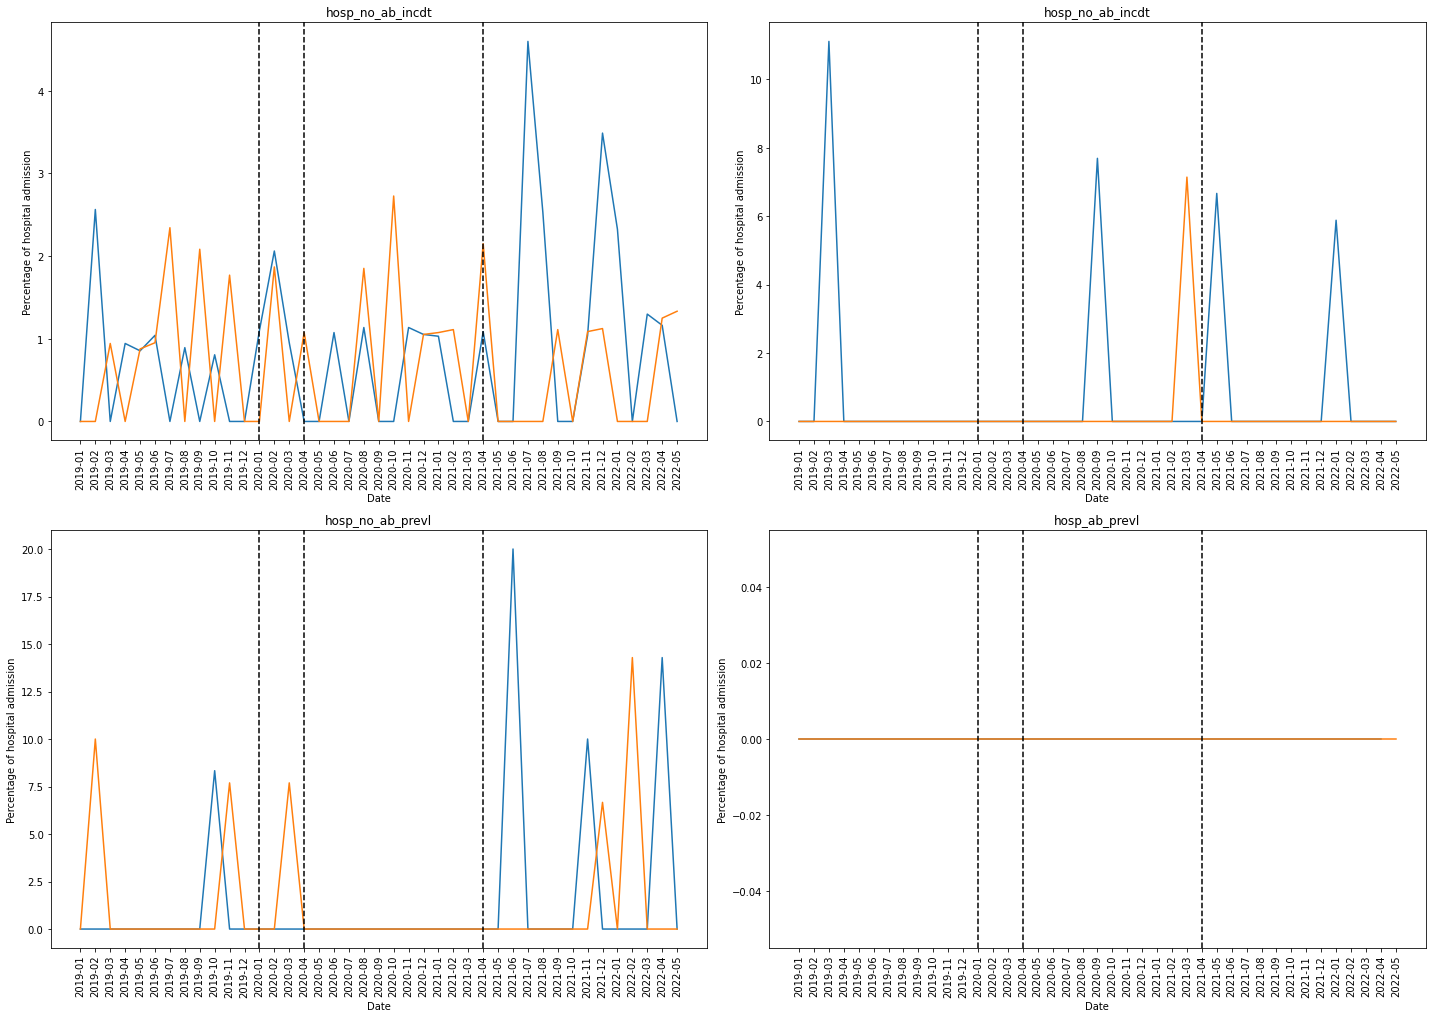

In [216]:
fig, axes = plt.subplots(2,2,
                        figsize=(20, 15)
                        )
create_lineplot_nolegend('hosp_perc_no_ab_incdt', 'infection', 'hosp_no_ab_incdt', 'Percentage of hospital admission', axes[0,0])
create_lineplot_nolegend('hosp_perc_ab_incdt', 'infection', 'hosp_no_ab_incdt', 'Percentage of hospital admission', axes[0,1])
create_lineplot_nolegend('hosp_perc_no_ab_prevl', 'infection', 'hosp_no_ab_prevl', 'Percentage of hospital admission', axes[1,0])
create_lineplot_nolegend('hosp_perc_ab_prevl', 'infection', 'hosp_ab_prevl', 'Percentage of hospital admission', axes[1,1])
# fig.delaxes(ax=axes[6,1])

fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hosp_plots/hosp_percentage_incdt_prevl_noabs_abs_nolegend.jpg')
plt.show()